# Clustering:
* Works on unlabled data
* This is Not prediction algorithm
* Classification is different than Clustering
* In classifications we already know labled group
* Here In clustering we are dividing the data
* Data Points are grouped so that point within same cluster are similar to each other and point within different cluster are dissimilar
* These points are grouped by Distance methods like : **Euclidean,cosine,Jaccard,edit distance**

### Examples Of Clustering:
* Cluster customers based on their purchase
histories
* Cluster products based on the sets of
customers who purchased them
* Cluster documents based on similar words or
shingles
* Cluster DNA sequences based on edit
distance

### Method Of Clustering:
* Hierarchical ( Agglomerative ) : start from idivisual and start grouping them untill get bigger groups
* Initially each point is cluster itself
* Repeatedly combine each cluster to nearest cluster into one
* Maintain set of cluster and place points into their nearest cluster

### Euclidean Distance:
* Each cluster has well defined centroid
* The distance between two centroid of cluster is maximum
* The distance between member points of cluster and centroid of cluster should be minimum

### Non-Euclidean Distance: (No calculation done on Centroid)
* No need to calculate each point distance from centroid we can calculate smallest min Average distance from points

* TO calculate distance between tow cluster we can take shorted distance between points of each cluster and calculate distance

* To calculate range of perticular cluster then we can take points which have maximum distance between them then that is Diameter using this Dimeter we can findout range of cluster

### Cohesion:
* Approch 1: Using this diameter we can merge two cluster i.e Maximun Distance Between Points in Cluster
* Approch 2: Or we can use avrage distance between 2 points in cluster
* Approch 3: Use Density based approch take diameter or avrage distance and devide by the number of points in the cluster



## Stoping Criteria:
* Stop when we have k clusters
* stop when cohesion of clusters resulting from big merge fall from big clustering below threshold
* Stop when there is a sudden jump in the cohesive value

In [1]:
# Classification Vs Clustering
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
data = load_iris()
X = data.data
y = data.target
data.target_names
# dtype = 'U10' -> unicode 10 characters

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

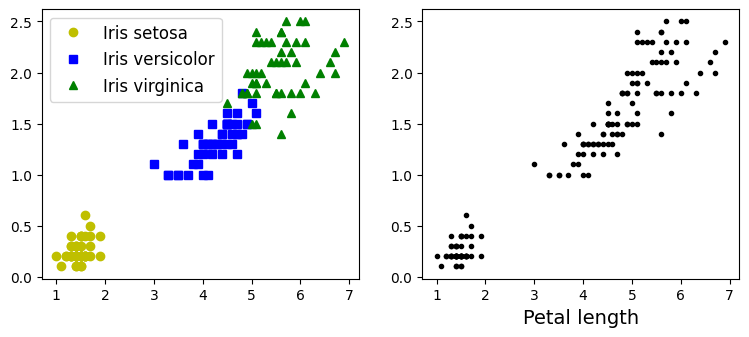

In [3]:
plt.figure(figsize=(9,3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.legend(fontsize=12)
plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.show()

In [4]:
# K-Means Algorithm
from sklearn.datasets import make_blobs
import numpy as np

In [5]:
# making arbirary Centures these are going to change when point is added
blob_centers = np.array(
 [[ 0.2, 2.3],
 [-1.5 , 2.3],
 [-2.8, 1.8],
 [-2.8, 2.8],
 [-2.8, 1.3],
  [-0.5,2]])
# standerd dev of clusters this values will efect how close data is if this values is less data will be closer to each other
#  0.1 is too much colser to each other than 0.4
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.2, 0.1])

In [6]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
 cluster_std=blob_std, random_state=7)
X,y

(array([[-0.39823941,  2.0454702 ],
        [-2.87459835,  2.8097575 ],
        [ 0.96077126,  1.17046777],
        ...,
        [-2.80607085,  1.15896231],
        [ 0.24057359,  2.40103109],
        [-2.63807768,  2.95621065]]),
 array([5, 3, 0, ..., 4, 0, 3]))

In [7]:
def plot_clusters(X, y=None):
 plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
 plt.xlabel("$x_1$", fontsize=14)
 plt.ylabel("$x_2$", fontsize=14, rotation=0)

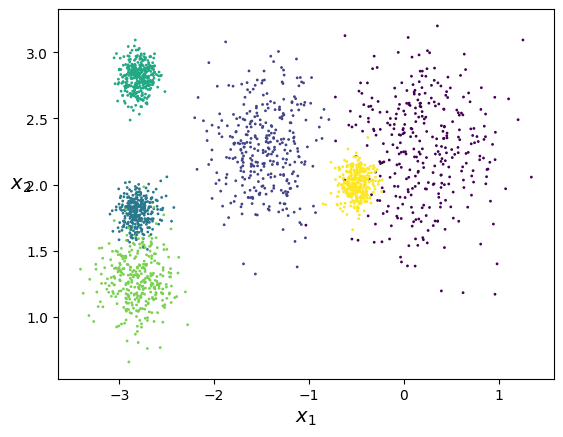

In [8]:
plot_clusters(X,y)

In [9]:
# Now the real k-means
from sklearn.cluster import KMeans

In [10]:
k = 5
kmeans = KMeans(n_clusters = k, random_state=42)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
y_pred

array([4, 3, 1, ..., 2, 1, 3], dtype=int32)

In [12]:
y_pred is kmeans.labels_

True

In [13]:
# Changed clusters centers
kmeans.cluster_centers_

array([[-1.48792681,  2.27546012],
       [ 0.35104553,  2.30473777],
       [-2.80861957,  1.53912249],
       [-2.79288354,  2.80955045],
       [-0.47095797,  2.02765424]])

In [14]:
# Now check for 4 points
x_new = np.array([[0,2],[3,-2],[-3,3],[-3,2.5]])
kmeans.predict(x_new)
# this algorithm will always lable clusters line 0,1,2,3,4,..... these lables are by deafult we can change these

array([1, 1, 3, 3], dtype=int32)

# Decision Boundaries

In [19]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],marker='o', s=30, linewidths=8,color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],marker='x', s=50, linewidths=50,color=cross_color, zorder=11, alpha=1)

In [18]:
plt.figure(figsize=(8, 4))
# plot_decision_boundaries(kmeans, X)
plt.show()

<Figure size 800x400 with 0 Axes>

## Naive Implementation
* At each step compute pairwise steps distance between each pair of cluster O(N^3)
* Implementation using a priority queue can reduce time upto O(N^2 logN)
* Too expensive for really big data sets that don't fit in memory